### ANÁLISIS DE DATASET DE VIDEOJUEGOS POPULARES DE 1980 A 2023

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#### INICIALIZANDO EL DATAFRAME

In [21]:
datos = pd.read_csv(r"C:\Users\gabriela\Documents\Dataset\games.csv", index_col="Id")
datos.head() #muestra las primeras 5 lineas del dataset
#datos.describe()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


## DIMENSIÓN DEL DATASET

In [24]:
print(f"Cantidad de filas y columnas del Dataset: {datos.shape}")

Cantidad de filas y columnas del Dataset: (1512, 13)


### mostrando información del dataset

In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


#### IDENTIFICANDO EN QUÉ COLUMNAS HAY DATOS NULOS

In [27]:
datos.isnull()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,False,False,False,False,False,False,False,False,False,False,False,False,False
1508,False,False,False,False,False,False,False,False,False,False,False,False,False
1509,False,False,False,False,False,False,False,False,False,False,False,False,False


### Identificando las columnas con datos nulos

In [28]:
datos.isnull().any()

Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

In [31]:
# Filtrar las filas que contienen los datos nulos
filas_nulas = datos[datos.isnull().any(axis=1)]
print(filas_nulas)

                                                  Title     Release Date  \
Id                                                                         
587                                   Final Fantasy XVI     Jun 22, 2023   
649                                   Death Stranding 2  releases on TBD   
713                           Final Fantasy VII Rebirth     Dec 31, 2023   
719                                           Lies of P     Aug 01, 2023   
726                                               Judas     Mar 31, 2025   
746   Like a Dragon Gaiden: The Man Who Erased His Name     Dec 31, 2023   
972           The Legend of Zelda: Tears of the Kingdom     May 12, 2023   
1130                           Star Wars Jedi: Survivor     Apr 28, 2023   
1160            We Love Katamari Reroll + Royal Reverie     Jun 02, 2023   
1202                                         Earthblade     Dec 31, 2024   
1245                               NEET Girl Date Night     Oct 21, 2022   
1305        

#### Eliminando los datos nulos del dataset

In [32]:
data_sin_nulos =datos.dropna()
data_sin_nulos

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206


#### Función para verificar si el género RPG está presente dentro del dataset

In [34]:
def filtro_rpg(genres):
    return "RPG" in genres

#Aplica el filtro utilizando apply
datosRPG = data_sin_nulos[data_sin_nulos["Genres"].apply(filtro_rpg)]

#Muestra el dataset solamente incluyendo la columna Titulo y Ranking
nombresRPG = datosRPG[["Title", "Rating"]]
nombresRPG.head(20)

,Title,Rating
Id,,
0,Elden Ring,4.5
1,Hades,4.3
2,The Legend of Zelda: Breath of the Wild,4.4
3,Undertale,4.2
6,Omori,4.2
9,NieR: Automata,4.3
10,Persona 5 Royal,4.4
12,God of War,4.2
14,Bloodborne,4.5


In [35]:
nombresRPG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   516 non-null    object 
 1   Rating  516 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


#### MOSTRANDO LOS PRIMEROS 10 VIDEOJUEGOS RPG Y SU RATING DE POPULARIDAD

<Axes: xlabel='Id'>

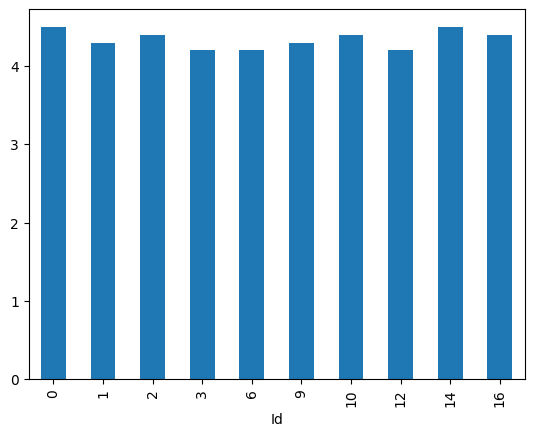

In [37]:
datasetRPG  = nombresRPG.head(10)
#NO ES LO ÓPTIMO
datasetRPG.drop(["Title"], axis=1)["Rating"].plot(kind="bar")